# Hepatitis Survival Prediction

+ Feature Selection
+ Data Exploration
+ Plotting 
+ Build Model
+ Interpret and Evaluate
+ Confusion Metrics
+ Productionize
+ Deployment

## Importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
import sweetviz
import seaborn as sns

In [3]:
data = pd.read_csv("hepatitis.csv")

---

---

## 1. Feature Selection

- #### SelectKBest
    - Used to select the features that are strongly corelated to output 
    
- #### Recursive Feature Elimination
    - Used to eliminate the features that are not useful
    
- #### ExtraTreesClassifier
    - Used to select the important features

In [4]:
data.tail()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.2,100,19,3.1,42,2


<h3 style="color:red">Warning</h3>
<br>
   Dont run below cell twice<br>
   If you have run twice, restart kernel and rerun the code from first cell

In [5]:
"""
making 2 as 1 and 1 as 0 of class column
"""
class_map={1:0, 2:1}
data["class"] = data["class"].map(class_map)

In [6]:
"""
we have to predict class

class 0 --- Dead
class 1 --- Survived

"""
data.tail()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
150,0,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,1,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,1,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,1,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2
154,0,43,1,2,2,1,2,2,2,2,1,1,1,2,1.2,100,19,3.1,42,2


In [7]:
data.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          155 non-null    int64  
 4   antivirals       155 non-null    int64  
 5   fatigue          155 non-null    int64  
 6   malaise          155 non-null    int64  
 7   anorexia         155 non-null    int64  
 8   liver_big        155 non-null    int64  
 9   liver_firm       155 non-null    int64  
 10  spleen_palpable  155 non-null    int64  
 11  spiders          155 non-null    int64  
 12  ascites          155 non-null    int64  
 13  varices          155 non-null    int64  
 14  bilirubin        155 non-null    float64
 15  alk_phosphate    155 non-null    int64  
 16  sgot             155 non-null    int64  
 17  albumin         

In [9]:
data.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,0.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,1.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,1.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [10]:
"""
Using SelectKBest
"""

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
"""
Selecting X and y from the dataset
"""

cols = data.columns.to_list()
cols

['class',
 'age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [12]:
X_col = cols[1:]
y_col = cols[0]

In [13]:
print(X_col)  # Columns of X
print()
print(y_col) # Columns of y

['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']

class


In [14]:
X = data[X_col]
y = data[y_col]

In [15]:
# Using SelectKBest
skb = SelectKBest(score_func=chi2, k=10) # Selecting features according to 10 highest scores

best_features = skb.fit(X,y)

In [16]:
best_features.scores_

array([ 28.47481919,   0.38948319,   0.3995129 ,   0.18634161,
         2.34643234,   2.46803203,   0.19648065,   0.31698209,
         0.9867095 ,   0.74535155,   3.18940804,   2.09639954,
         1.12812176,  30.10247172,  17.88270548,  47.38820795,
         6.87318606, 130.18332457,   3.01854675])

In [17]:
"""
Creating DataFrame from scores
"""

scores = pd.DataFrame(best_features.scores_, columns=["Best Scores"])

In [18]:
scores

,Best Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [19]:
"""
Getting the columns name
"""

data_columns_name = pd.DataFrame(X.columns, columns=["Columns Name"])
data_columns_name

,Columns Name
0,age
1,sex
2,steroid
3,antivirals
4,fatigue
5,malaise
6,anorexia
7,liver_big
8,liver_firm
9,spleen_palpable


In [20]:
columns_scores = pd.concat([data_columns_name, scores], axis=1)

In [21]:
columns_scores

,Columns Name,Best Scores
0,age,28.474819
1,sex,0.389483
2,steroid,0.399513
3,antivirals,0.186342
4,fatigue,2.346432
5,malaise,2.468032
6,anorexia,0.196481
7,liver_big,0.316982
8,liver_firm,0.986710
9,spleen_palpable,0.745352


#### Note
- We have to find the columns that have the highest scores
- The columns that have highest scores will be the most important columns

In [22]:
"""
Sorting the dataframe by descending order according to 'Best Scores' column
"""
columns_scores.sort_values(by='Best Scores',ascending=False,inplace=True)
columns_scores

,Columns Name,Best Scores
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


### Note
- protime is the most important feature of them all
- antivirals is not that important

In [23]:
"""
Finding the top features that have scores greater than 2
"""
column_scores_new = columns_scores[columns_scores["Best Scores"].values>2.3]

In [24]:
column_scores_new  #Most important features

,Columns Name,Best Scores
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


### Optional Methods for Feature Selection

+ Recursive Feature Elimination (RFE)
+ ExtraTreeClassifier

### ** Note **
- These are completely optional methods to select important features

#### RFE

In [25]:
from warnings import filterwarnings
filterwarnings(action="ignore")

In [26]:
"""
RFE
"""
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
rfe = RFE(lr,8)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(), n_features_to_select=8)

In [27]:
rfe.ranking_

array([ 8,  1,  5,  9,  1,  1,  1,  4,  6,  7,  1,  2,  3,  1, 11, 10,  1,
       12,  1])

In [28]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True])

In [29]:
rfe_rankings = pd.DataFrame({"RFE Ranking": rfe.ranking_, "RFE Support": rfe.support_})

In [30]:
rfe_data = pd.concat([data_columns_name, rfe_rankings], axis=1)

In [31]:
rfe_data

,Columns Name,RFE Ranking,RFE Support
0,age,8,False
1,sex,1,True
2,steroid,5,False
3,antivirals,9,False
4,fatigue,1,True
5,malaise,1,True
6,anorexia,1,True
7,liver_big,4,False
8,liver_firm,6,False
9,spleen_palpable,7,False


In [32]:
"""
Sorting the dataframe according to highest ranking, False Support

Highest Ranking -- Highest Priority

"""

rfe_data.sort_values(by="RFE Ranking", ascending=False, inplace=True)
rfe_data.nlargest(12,"RFE Ranking")

,Columns Name,RFE Ranking,RFE Support
17,protime,12,False
14,alk_phosphate,11,False
15,sgot,10,False
3,antivirals,9,False
0,age,8,False
9,spleen_palpable,7,False
8,liver_firm,6,False
2,steroid,5,False
7,liver_big,4,False
12,varices,3,False


#### Another Optional Method

In [33]:
"""
Extra Tree Classifier for checking importance of features
"""
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier()

In [34]:
etc.feature_importances_

array([0.05437144, 0.02049043, 0.02617268, 0.01132998, 0.03278923,
       0.05410862, 0.02961029, 0.04477884, 0.04680614, 0.04019563,
       0.06256586, 0.08745377, 0.04650948, 0.09650293, 0.06847335,
       0.0530875 , 0.07734171, 0.07375718, 0.07365496])

In [35]:
etc_imp_data = pd.DataFrame(etc.feature_importances_, columns=['Important Features'])

In [36]:
etc_imp_data

,Important Features
0,0.054371
1,0.020490
2,0.026173
3,0.011330
4,0.032789
5,0.054109
6,0.029610
7,0.044779
8,0.046806
9,0.040196


In [37]:
etc_data = pd.concat([data_columns_name, etc_imp_data], axis=1)

In [38]:
etc_data.sort_values(by='Important Features', inplace=True, ascending=False)

In [39]:
etc_data.head(12)  #Selecting 12 best features

,Columns Name,Important Features
13,bilirubin,0.096503
11,ascites,0.087454
16,albumin,0.077342
17,protime,0.073757
18,histology,0.073655
14,alk_phosphate,0.068473
10,spiders,0.062566
0,age,0.054371
5,malaise,0.054109
15,sgot,0.053087


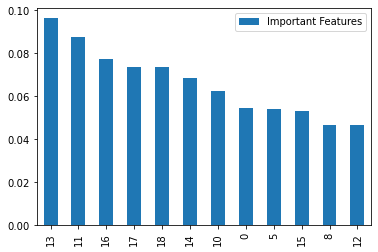

In [40]:
etc_data.head(12).plot(kind='bar')

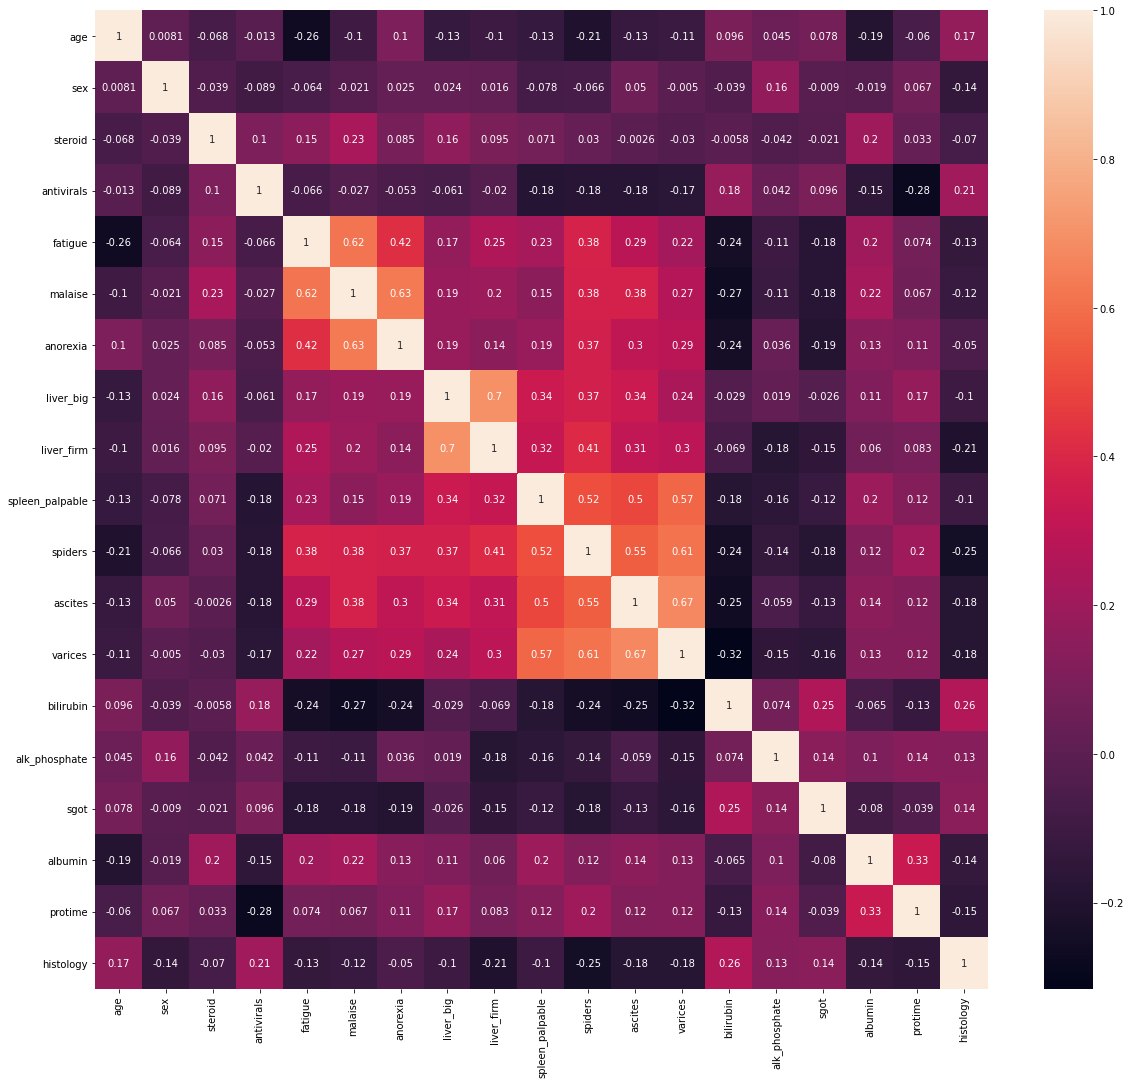

In [41]:
plt.figure(figsize=(20,18))
sns.heatmap(X.corr(), annot=True)  #Corelation

### Selecting the important features and removing the unnecessary ones

In [42]:
data_cols = list(column_scores_new["Columns Name"].values)

In [43]:
data_cols  ### These are important features

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'malaise',
 'fatigue']

---

---

## 2. Data Exploration, Analysis and Plotting

### Sweetviz Report
- Used for Data Visualization

In [44]:
"""
Go to directory to see the entire report in HTML
"""

EDAreport = sweetviz.analyze(data)
EDAreport.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


----

### Pandas Profiling

In [43]:
"""
Useful tool for EDA
You can also check the html file in directory 
"""
pandas_profile = pandas_profiling.ProfileReport(data)
pandas_profile.to_widgets()

In [ ]:
pandas_profile.to_file("Pandas Profiling.html") # Generates the HTML file in the working directory

In [45]:
print(data.shape)
print(data.size)

(155, 20)
3100


In [46]:
# As seen above, there are no null values

In [47]:
data.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [48]:
data["sex"].value_counts()
# male - 1
# female - 2

1    139
2     16
Name: sex, dtype: int64

In [49]:
data["class"].value_counts()
# Survival as 1
# Dead as 0

1    123
0     32
Name: class, dtype: int64

Text(0, 0.5, 'Count')

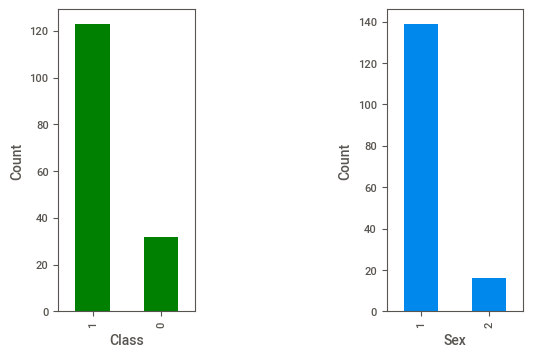

In [50]:
plt.subplot(1,3,1)  #subplot(row,col,position)
data["class"].value_counts().plot(kind="bar", color="g")
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1,3,3)
data["sex"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Count")

In [51]:
print(data["age"].min())
print(data["age"].max())

7
78


----

### Setting cumulative frequency for different age group

In [52]:
labels=["0-10","10-20",'20-30','30-40','40-50','50-60','60-70','70+']
bins=[0,10,20,30,40,50,60,70,80]
age_freq = data.groupby(pd.cut(data['age'], bins=bins, labels=labels)).size()

In [53]:
age_freq

age
0-10      1
10-20     3
20-30    29
30-40    50
40-50    35
50-60    24
60-70    11
70+       2
dtype: int64

In [54]:
age_freq.reset_index(name="count")

,age,count
0,0-10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70+,2


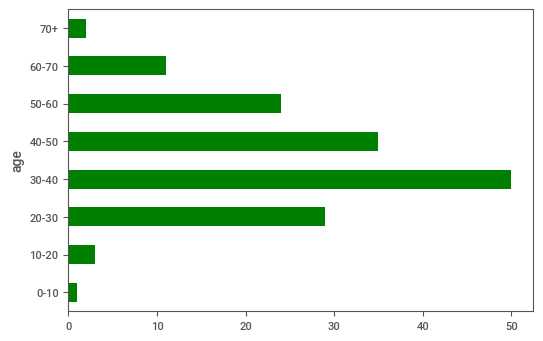

In [55]:
age_freq.plot(kind="barh",color="green")  #Age 30-40 is affected more by hepatitis

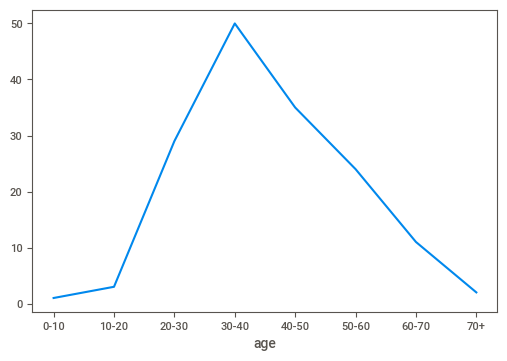

In [56]:
age_freq.plot(kind="line")

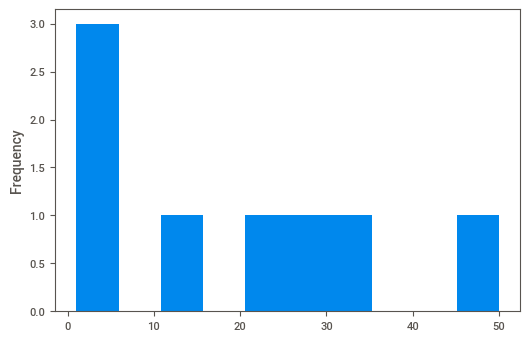

In [57]:
age_freq.plot(kind="hist")

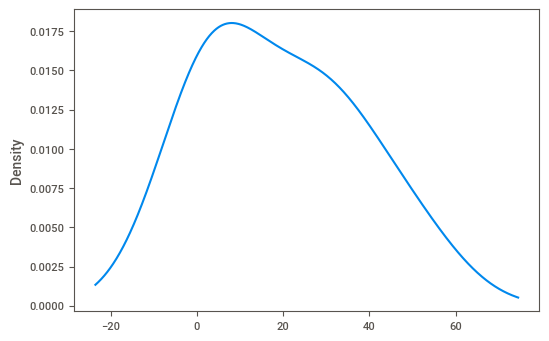

In [58]:
age_freq.plot(kind="kde")

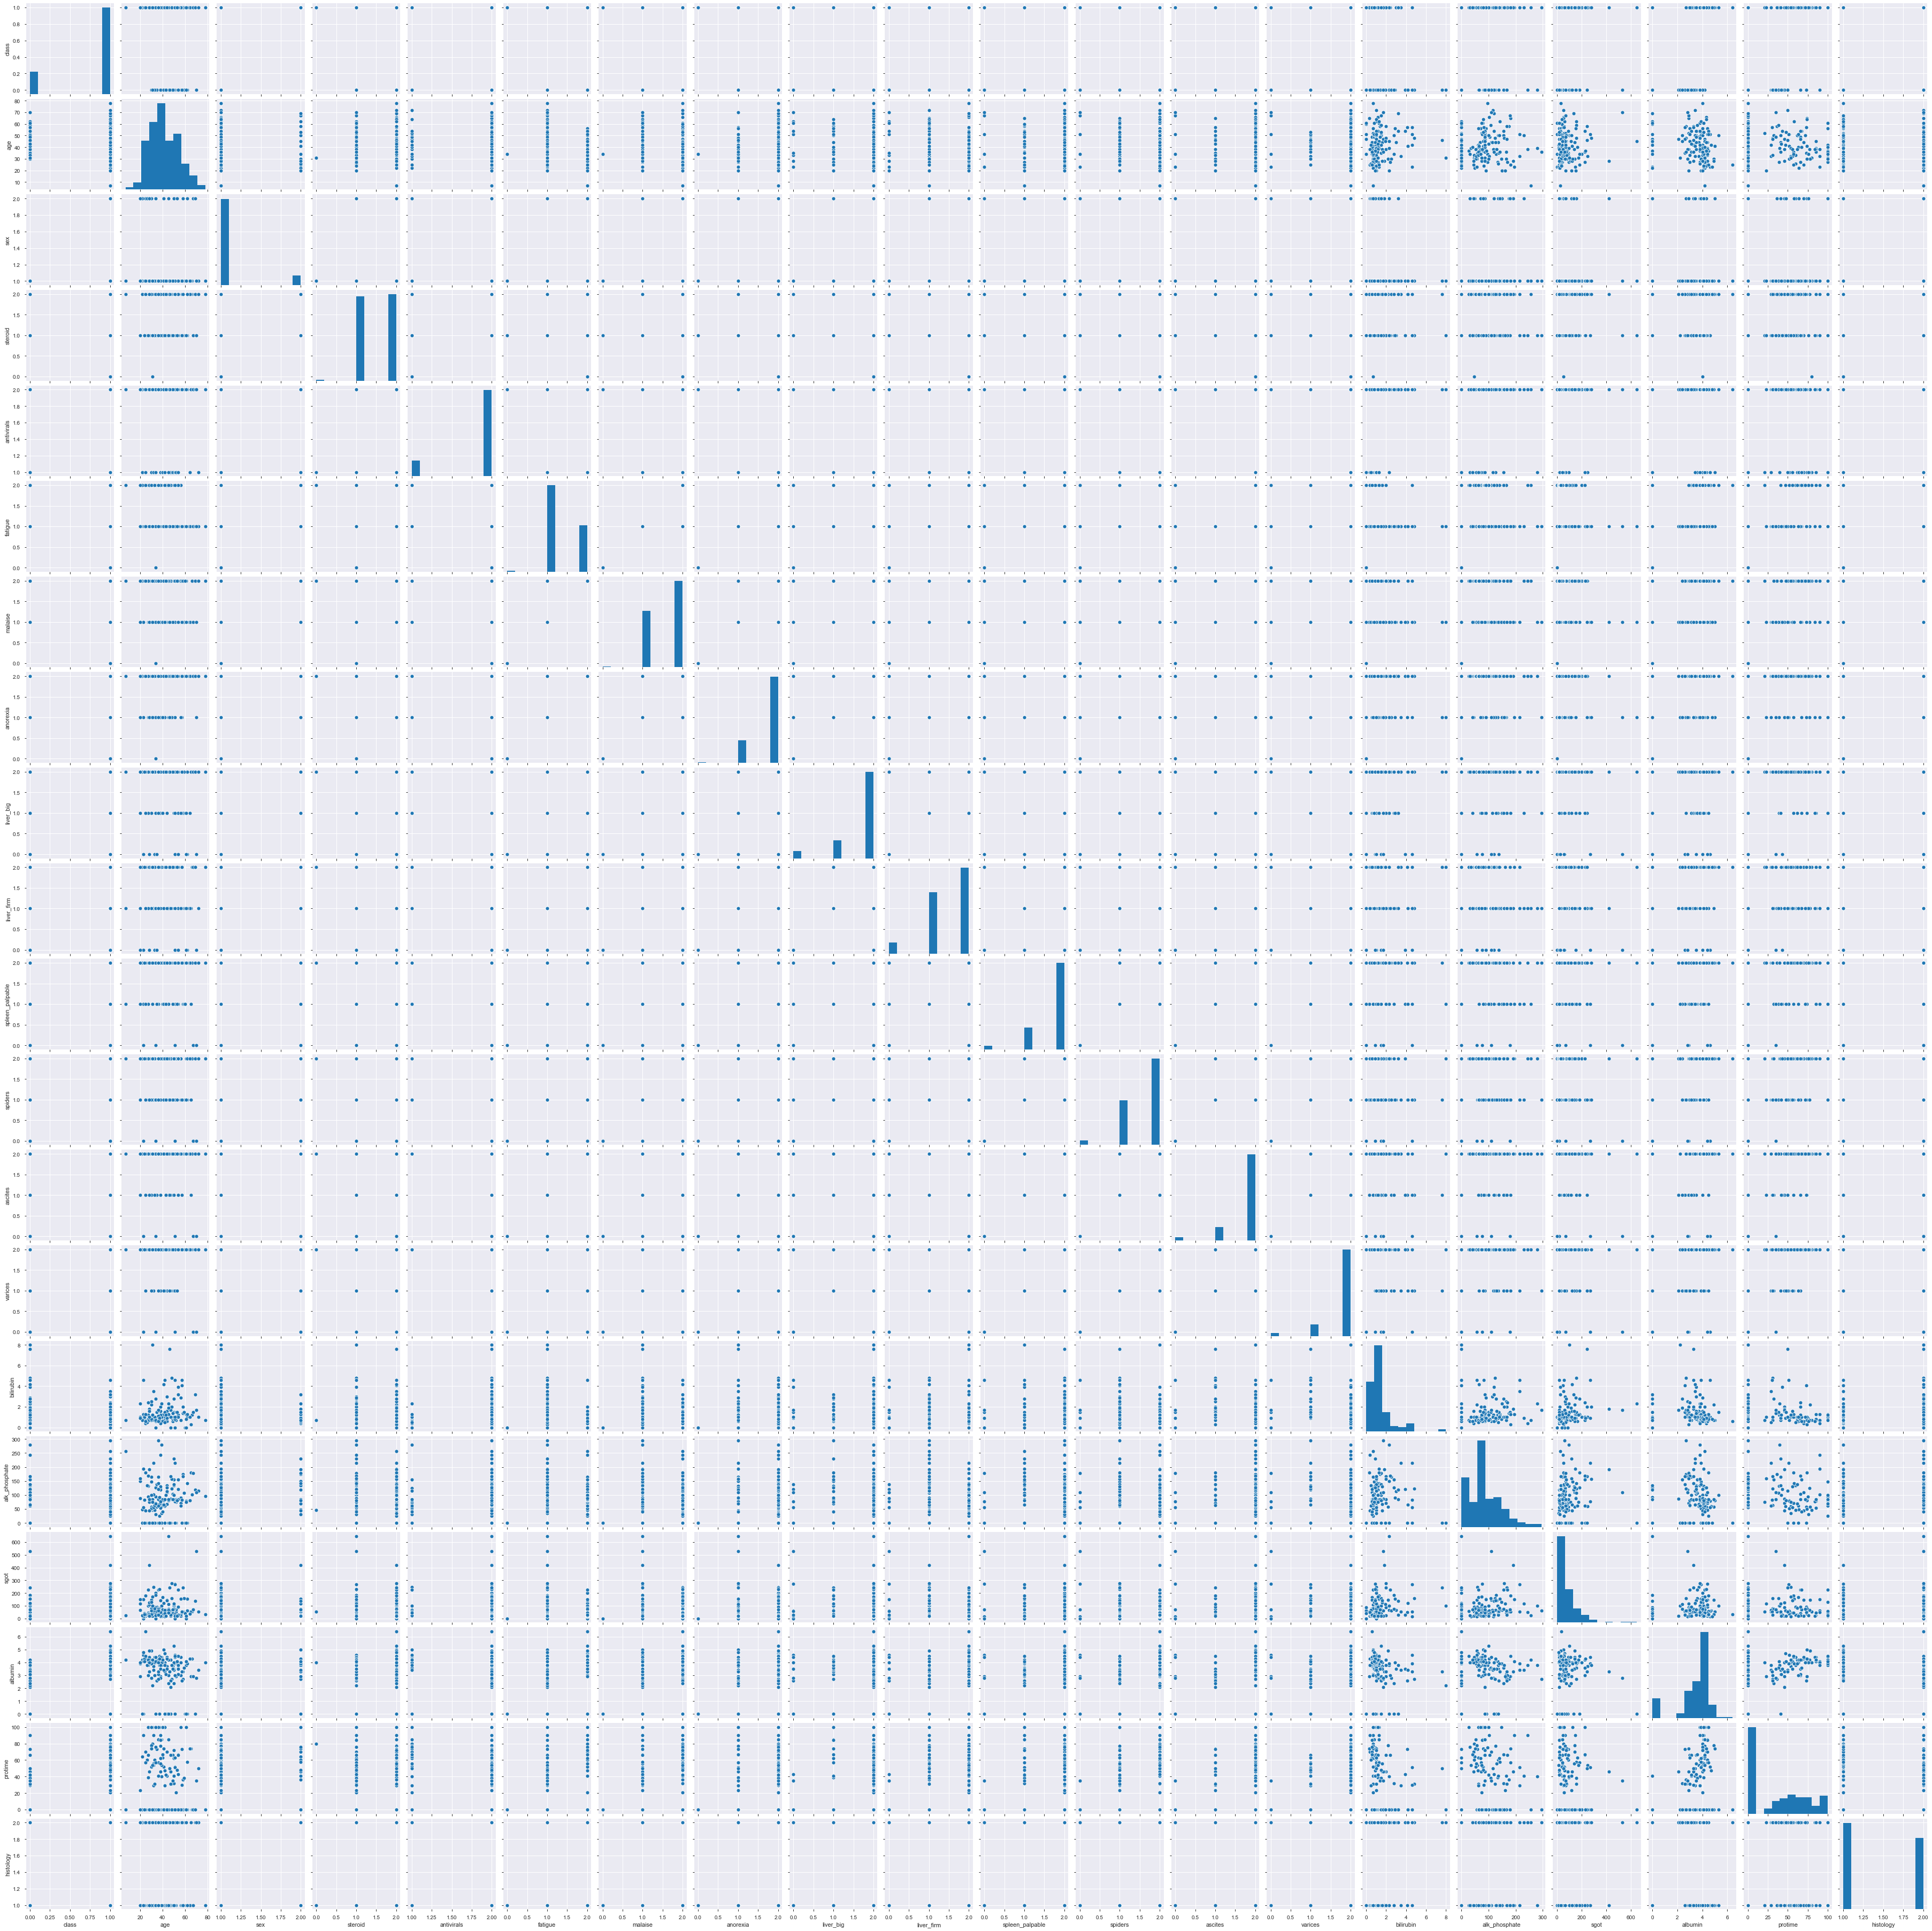

In [58]:
sns.pairplot(data)

----

### Univariate Analysis and Multivariate Analysis
 - Analysis using box plot and scatter plot 
 + Outlier Detection

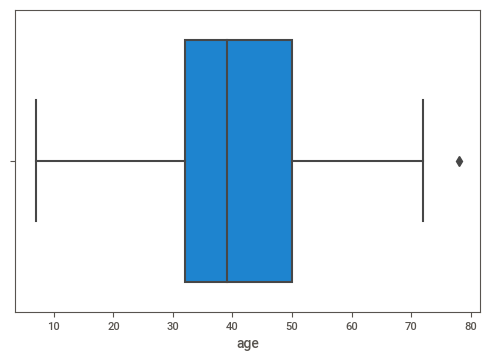

In [59]:
#Box plot for univariate feature, outlier detection
sns.boxplot(data["age"])

### From figure above:

+ Outlier is at around 80 years of age
+ We have to remove the outlier by eliminatiing it
+ But first find out all other outliers

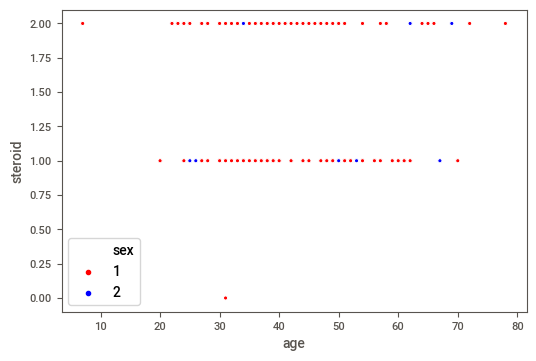

In [60]:
sns.scatterplot(data["age"], data["steroid"], hue=data["sex"],palette=["red","blue"])


### Insight
- Male takes more steroid than females 

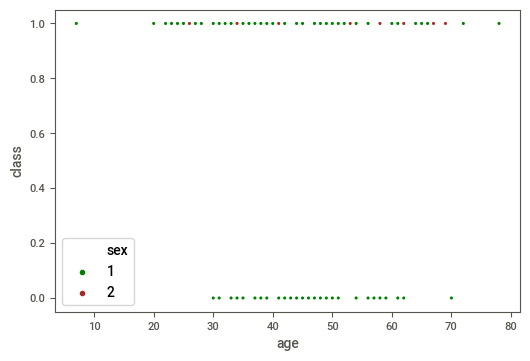

In [61]:
sns.scatterplot(data["age"], data["class"], hue=data["sex"], palette=["green",'brown'])

### Insight

+ Age 30-60 died mostly from hepatitis
+ Age 10-30 and 60 above mostly survived
+ Most of the died person are male

---

### Inter Quartile Range for multiple Outlier Detection

In [62]:
"""
Before removing outliers, lets make the new data that have only important features
"""
bst_x = data[data_cols]
bst_y = data['class']

In [63]:
bst_y = pd.DataFrame(data["class"], columns=["class"])
bst_y

,class
0,1
1,1
2,1
3,1
4,1
...,...
150,0
151,1
152,1
153,1


### Important Note:
<h4 style="color: green"> Outlier detection must be done only on features columns not on target columns</h4>

In [64]:
new_data = bst_x
new_data.head()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,0,18,1.0,30,85,4.0,2,1,2,2
1,0,42,0.9,50,135,3.5,2,1,2,1
2,0,32,0.7,78,96,4.0,2,1,2,1
3,80,52,0.7,31,46,4.0,2,1,2,2
4,0,200,1.0,34,0,4.0,2,1,2,2


In [64]:
new_data.tail()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
150,50,242,7.6,46,0,3.3,1,2,1,1
151,0,142,0.9,44,126,4.3,2,2,2,1
152,0,20,0.8,61,75,4.1,1,2,1,1
153,48,19,1.5,53,81,4.1,1,2,2,1
154,42,19,1.2,43,100,3.1,1,2,2,1


In [65]:
"""
Now we will use IQR to detect multiple outlier from the dataset

The formula for IQR is Q3-Q1
So we have to calculate Q3 and Q1 first

Q1 - 25%
Q3 - 75%

"""

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3-Q1
IQR

protime          65.00
sgot             68.50
bilirubin         0.80
age              18.00
alk_phosphate    68.50
albumin           1.15
spiders           1.00
histology         1.00
malaise           1.00
fatigue           1.00
dtype: float64

### Insight

- Columns -- "age", "alk_phosphate", "sgot", "protime" have high values
- Above columns have maximum outliers

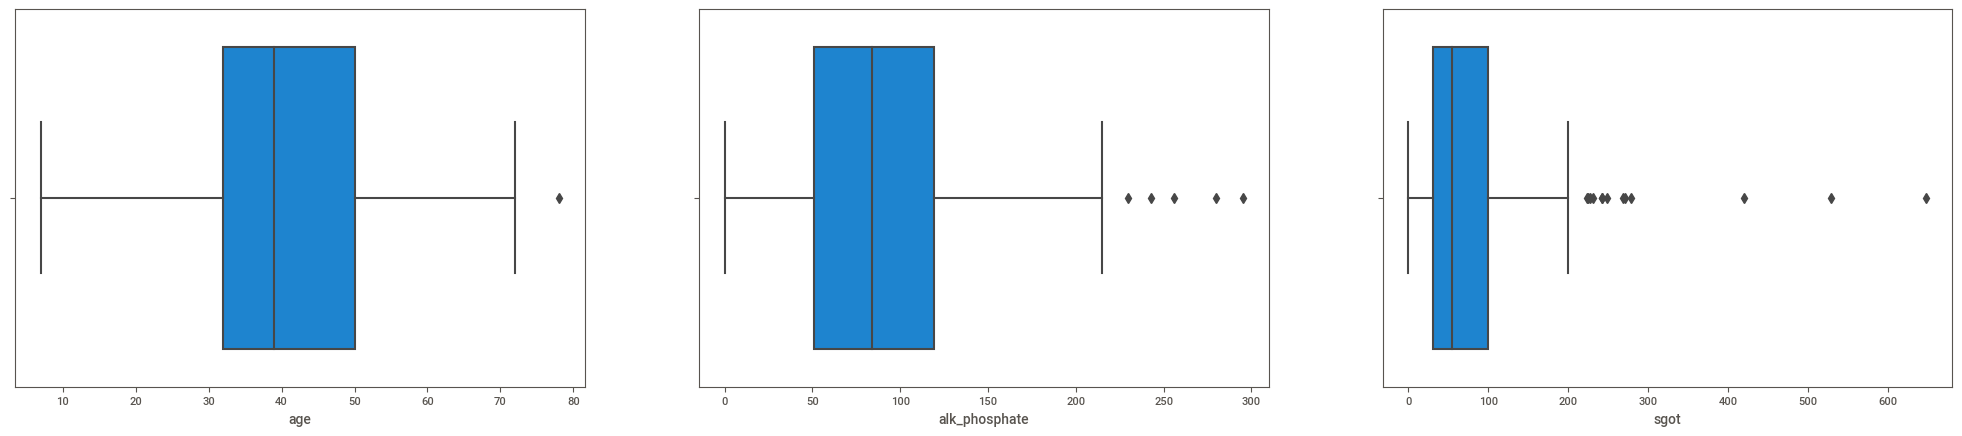

In [66]:
"""
Verifying the outliers by boxplot
"""
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.boxplot(data['age'])

plt.subplot(1,3,2)
sns.boxplot(new_data['alk_phosphate'])

plt.subplot(1,3,3)
sns.boxplot(new_data["sgot"])

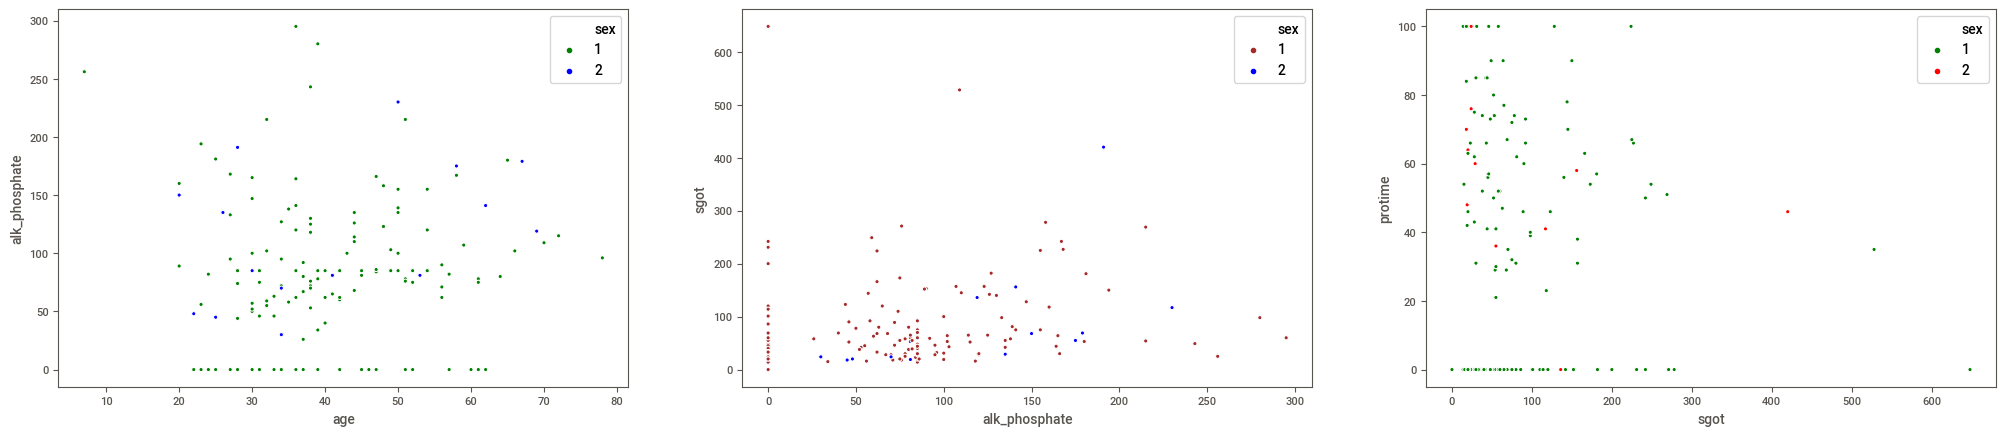

In [67]:
"""
Verifying outliers by Scatter plot based on gender
"""

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.scatterplot(new_data['age'], new_data['alk_phosphate'], hue=data['sex'], palette=["green",'blue'])

plt.subplot(1,3,2)
sns.scatterplot(new_data['alk_phosphate'], new_data['sgot'], hue=data['sex'], palette=["brown",'blue'])

plt.subplot(1,3,3)
sns.scatterplot(new_data["sgot"], new_data['protime'], hue=data['sex'], palette=["green",'red'])

---

### Getting exact outliers

In [68]:
(new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
150,False,True,True,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False


### Insights
- Here the data points that are true are actual outliers. They are very far from mean

In [70]:
"""
Replacing the outliers with NaN

"""
data_no_outliers = new_data[~((new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR)))] # ~ sign denotes the not 

In [71]:
data_no_outliers

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,0,18.0,1.0,30.0,85.0,4.0,2,1,2,2
1,0,42.0,0.9,50.0,135.0,3.5,2,1,2,1
2,0,32.0,0.7,NaN,96.0,4.0,2,1,2,1
3,80,52.0,0.7,31.0,46.0,4.0,2,1,2,2
4,0,200.0,1.0,34.0,0.0,4.0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...
150,50,NaN,NaN,46.0,0.0,3.3,1,2,1,1
151,0,142.0,0.9,44.0,126.0,4.3,2,2,2,1
152,0,20.0,0.8,61.0,75.0,4.1,1,2,1,1
153,48,19.0,1.5,53.0,81.0,4.1,1,2,2,1


### Insights
- Outliers are replaced by NaN Values


In [72]:
print(new_data.shape)
print(data_no_outliers.shape)

(155, 10)
(155, 10)


In [73]:
dno = data_no_outliers

In [74]:
dno.head()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,0,18.0,1.0,30.0,85.0,4.0,2,1,2,2
1,0,42.0,0.9,50.0,135.0,3.5,2,1,2,1
2,0,32.0,0.7,NaN,96.0,4.0,2,1,2,1
3,80,52.0,0.7,31.0,46.0,4.0,2,1,2,2
4,0,200.0,1.0,34.0,0.0,4.0,2,1,2,2


In [75]:
dno.isnull().sum()

protime           0
sgot             13
bilirubin        17
age               1
alk_phosphate     5
albumin          17
spiders           0
histology         0
malaise           0
fatigue           0
dtype: int64

#### These all above NaN values are outliers

In [76]:
"""
Lets see the percentage of NaN values for each columns(Percentage of outliers)
"""

dno.isnull().mean() 

protime          0.000000
sgot             0.083871
bilirubin        0.109677
age              0.006452
alk_phosphate    0.032258
albumin          0.109677
spiders          0.000000
histology        0.000000
malaise          0.000000
fatigue          0.000000
dtype: float64

### Notes:
- albumin and bilirubin have bigger numbers of outliers

### Removing the NaN Values
1. .any() function is used to return all the values that matches the condition
2. In our case, the condition was to return all the values that are only false
3. So, .any() returns all the rows that have no NaN values

### Important Note
- Before removing outlier, we have to append the target column

In [77]:
"""
Adding sex column and class column dont matter coz they are already categorical and dont have outliers
"""
dno['sex'] = data["sex"]
dno['class'] = data["class"]

In [79]:
dno.tail()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue,sex,class
150,50,NaN,NaN,46.0,0.0,3.3,1,2,1,1,1,0
151,0,142.0,0.9,44.0,126.0,4.3,2,2,2,1,1,1
152,0,20.0,0.8,61.0,75.0,4.1,1,2,1,1,1,1
153,48,19.0,1.5,53.0,81.0,4.1,1,2,2,1,2,1
154,42,19.0,1.2,43.0,100.0,3.1,1,2,2,1,1,0


In [80]:
dno.dropna(axis=0,inplace=True)  #drops the NaN (Outliers)

In [81]:
dno.tail()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue,sex,class
149,0,30.0,0.6,36.0,120.0,4.0,2,2,2,2,1,1
151,0,142.0,0.9,44.0,126.0,4.3,2,2,2,1,1,1
152,0,20.0,0.8,61.0,75.0,4.1,1,2,1,1,1,1
153,48,19.0,1.5,53.0,81.0,4.1,1,2,2,1,2,1
154,42,19.0,1.2,43.0,100.0,3.1,1,2,2,1,1,0


In [82]:
dno["class"].value_counts()

1    94
0    13
Name: class, dtype: int64

### Note:
- If after removing the outliers, all of our class type 0 is removed because of small dataset, we will use whole dataset for model building
- Our dataset is imbalanced

### Handling Imbalanced Dataset

In [83]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

In [84]:
"""
This is very important
Always choose the dataset that have no outliers
"""
X_final = dno.iloc[:,0:-1]
y_final = dno.iloc[:,-1]

In [90]:
from sklearn.model_selection import train_test_split
X_traine,X_teste,y_traine,y_teste = train_test_split(X_final, y_final, test_size=0.25, random_state=0)
print(X_traine.shape)
print(X_teste.shape)
print(y_traine.shape)
print(y_teste.shape)
print(X_final.shape)
print(y_final.shape)

(80, 11)
(27, 11)
(80,)
(27,)
(107, 11)
(107,)


In [91]:
y_teste.value_counts()

1    22
0     5
Name: class, dtype: int64

In [92]:
X_train, y_train = sm.fit_resample(X_traine.astype('float'), y_traine)

In [93]:
from collections import Counter
print("Before Smote: ", Counter(y_traine))
print("After Smote: ", Counter(y_train))

Before Smote:  Counter({1: 72, 0: 8})
After Smote:  Counter({1: 72, 0: 72})


### Notes:
- Before smotting, there were only 8 samples in '0' class
- After smotting, the samples size increased to 72

----

---

## 3. Model Building

### Importing necessary packages

In [95]:
"""
-  Building the model using various powerful techniques like ANN, XGBoost, Random Forest, AdaBoost, CatBoost
-  Comparing the accuracies and selecting the best model

"""
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, mean_absolute_error,f1_score,mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

import keras
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Activation,Dropout, BatchNormalization
from keras.models import Sequential

import xgboost,catboost

import pickle, joblib

---

#### XGBoost Classifier

In [96]:
"""
Boosting and bagging dont need scaling since their base model is decision tree
"""
xgbst = xgboost.XGBClassifier()

In [97]:
params={
    "max_depth":[5,15,25,35,45],
    "learning_rate":list(np.linspace(0.01,0.9, 15)),
    "colsample_bytree":list(np.linspace(0.1,0.9,10)),
    "alpha": list(np.linspace(0.1,0.9,10))
}
rscv_xgb = RandomizedSearchCV(xgbst,params,scoring="accuracy",cv=10, random_state=2)
rscv_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                                             0.8111111111111111,
                                                             0.9],
                                 

In [98]:
rscv_xgb.score(X_test, y_test)

0.8148148148148148

In [99]:
rscv_xgb.best_params_

{'max_depth': 35,
 'learning_rate': 0.8364285714285714,
 'colsample_bytree': 0.5444444444444445,
 'alpha': 0.8111111111111111}

In [100]:
rscv_xgb.best_score_

0.9652380952380953

----

#### AdaBoost Classifier

In [101]:
adbst = AdaBoostClassifier()

In [102]:
params1={
    "n_estimators":[5,15,25,35,45,50],
    "learning_rate":list(np.linspace(0.01,0.9, 15))
}
rscv_adb = RandomizedSearchCV(adbst,params1,scoring="accuracy",cv=10, random_state=2)
rscv_adb.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01,
                                                          0.07357142857142857,
                                                          0.13714285714285715,
                                                          0.20071428571428573,
                                                          0.2642857142857143,
                                                          0.32785714285714285,
                                                          0.39142857142857146,
                                                          0.455,
                                                          0.5185714285714286,
                                                          0.5821428571428572,
                                                          0.6457142857142857,
                                                          0.7092857142857143,
                            

In [103]:
rscv_adb.best_params_

{'n_estimators': 50, 'learning_rate': 0.7728571428571429}

In [104]:
rscv_adb.best_score_

0.9733333333333334

In [105]:
rscv_adb.score(X_test, y_test)

0.7407407407407407

---

#### Catboost Classifier

In [106]:
ctbst = catboost.CatBoostClassifier()

In [107]:
params2={
    "n_estimators":[5,15,25,35,45,50],
    "learning_rate":list(np.linspace(0.01,0.9, 15)),
    "max_depth":[1,3,5,7,9,11,13,15]
    
}
rscv_ctb = RandomizedSearchCV(ctbst,params2,scoring="accuracy",cv=10, random_state=2)
rscv_ctb.fit(X_train, y_train)

0:	learn: 0.4927812	total: 159ms	remaining: 635ms
1:	learn: 0.4088059	total: 169ms	remaining: 253ms
2:	learn: 0.3424863	total: 178ms	remaining: 119ms
3:	learn: 0.2879688	total: 185ms	remaining: 46.2ms
4:	learn: 0.2457785	total: 190ms	remaining: 0us
0:	learn: 0.5314781	total: 5.93ms	remaining: 23.7ms
1:	learn: 0.4669742	total: 9.38ms	remaining: 14.1ms
2:	learn: 0.3793142	total: 12.7ms	remaining: 8.44ms
3:	learn: 0.3198359	total: 15.6ms	remaining: 3.89ms
4:	learn: 0.2774370	total: 18.3ms	remaining: 0us
0:	learn: 0.4961911	total: 3.51ms	remaining: 14.1ms
1:	learn: 0.4061677	total: 6.22ms	remaining: 9.33ms
2:	learn: 0.3458498	total: 8.99ms	remaining: 6ms
3:	learn: 0.3007027	total: 11.6ms	remaining: 2.9ms
4:	learn: 0.2560688	total: 14.2ms	remaining: 0us
0:	learn: 0.5226803	total: 3.23ms	remaining: 12.9ms
1:	learn: 0.4367974	total: 5.76ms	remaining: 8.65ms
2:	learn: 0.3623390	total: 8.41ms	remaining: 5.61ms
3:	learn: 0.3098443	total: 11ms	remaining: 2.75ms
4:	learn: 0.2604815	total: 13.6ms	r

0:	learn: 0.4214086	total: 4.38ms	remaining: 105ms
1:	learn: 0.3313198	total: 5.63ms	remaining: 64.7ms
2:	learn: 0.2790314	total: 6.77ms	remaining: 49.7ms
3:	learn: 0.2251817	total: 7.94ms	remaining: 41.7ms
4:	learn: 0.1876748	total: 9.12ms	remaining: 36.5ms
5:	learn: 0.1668705	total: 10.3ms	remaining: 32.6ms
6:	learn: 0.1433809	total: 11.5ms	remaining: 29.6ms
7:	learn: 0.1219672	total: 12.7ms	remaining: 27.1ms
8:	learn: 0.1049742	total: 13.9ms	remaining: 24.8ms
9:	learn: 0.0881062	total: 15.1ms	remaining: 22.6ms
10:	learn: 0.0785370	total: 16.4ms	remaining: 20.9ms
11:	learn: 0.0716040	total: 17.5ms	remaining: 19ms
12:	learn: 0.0634439	total: 18.7ms	remaining: 17.3ms
13:	learn: 0.0583091	total: 19.9ms	remaining: 15.6ms
14:	learn: 0.0531604	total: 21.3ms	remaining: 14.2ms
15:	learn: 0.0492271	total: 22.5ms	remaining: 12.6ms
16:	learn: 0.0455315	total: 23.7ms	remaining: 11.2ms
17:	learn: 0.0416722	total: 24.9ms	remaining: 9.68ms
18:	learn: 0.0392809	total: 26.1ms	remaining: 8.24ms
19:	le

27:	learn: 0.2438079	total: 252ms	remaining: 63ms
28:	learn: 0.2356254	total: 264ms	remaining: 54.7ms
29:	learn: 0.2314342	total: 277ms	remaining: 46.2ms
30:	learn: 0.2274925	total: 290ms	remaining: 37.4ms
31:	learn: 0.2227499	total: 302ms	remaining: 28.3ms
32:	learn: 0.2197319	total: 314ms	remaining: 19ms
33:	learn: 0.2148745	total: 326ms	remaining: 9.59ms
34:	learn: 0.2099559	total: 339ms	remaining: 0us
0:	learn: 0.6552527	total: 23ms	remaining: 782ms
1:	learn: 0.6201410	total: 46.4ms	remaining: 765ms
2:	learn: 0.5741387	total: 47.8ms	remaining: 510ms
3:	learn: 0.5499382	total: 70.9ms	remaining: 550ms
4:	learn: 0.5131716	total: 72.5ms	remaining: 435ms
5:	learn: 0.4953375	total: 88.1ms	remaining: 426ms
6:	learn: 0.4592783	total: 88.5ms	remaining: 354ms
7:	learn: 0.4369665	total: 94.9ms	remaining: 320ms
8:	learn: 0.4234126	total: 107ms	remaining: 310ms
9:	learn: 0.4120765	total: 120ms	remaining: 301ms
10:	learn: 0.3867263	total: 121ms	remaining: 264ms
11:	learn: 0.3670850	total: 122ms	

24:	learn: 0.2569853	total: 325ms	remaining: 130ms
25:	learn: 0.2519163	total: 340ms	remaining: 118ms
26:	learn: 0.2386358	total: 340ms	remaining: 101ms
27:	learn: 0.2336944	total: 354ms	remaining: 88.5ms
28:	learn: 0.2265080	total: 368ms	remaining: 76.1ms
29:	learn: 0.2165010	total: 369ms	remaining: 61.5ms
30:	learn: 0.2096794	total: 383ms	remaining: 49.4ms
31:	learn: 0.2059126	total: 396ms	remaining: 37.2ms
32:	learn: 0.2029769	total: 410ms	remaining: 24.8ms
33:	learn: 0.1981573	total: 423ms	remaining: 12.4ms
34:	learn: 0.1938359	total: 436ms	remaining: 0us
0:	learn: 0.6487596	total: 14ms	remaining: 475ms
1:	learn: 0.6128474	total: 27.1ms	remaining: 447ms
2:	learn: 0.5626968	total: 28.1ms	remaining: 300ms
3:	learn: 0.5384217	total: 42ms	remaining: 325ms
4:	learn: 0.5201535	total: 55.3ms	remaining: 332ms
5:	learn: 0.4967137	total: 68.7ms	remaining: 332ms
6:	learn: 0.4774443	total: 81.7ms	remaining: 327ms
7:	learn: 0.4620965	total: 95.4ms	remaining: 322ms
8:	learn: 0.4460875	total: 108

33:	learn: 0.0236647	total: 36.7ms	remaining: 17.3ms
34:	learn: 0.0230926	total: 38.1ms	remaining: 16.3ms
35:	learn: 0.0225375	total: 39.7ms	remaining: 15.4ms
36:	learn: 0.0219703	total: 40.7ms	remaining: 14.3ms
37:	learn: 0.0214408	total: 42.1ms	remaining: 13.3ms
38:	learn: 0.0209629	total: 43.2ms	remaining: 12.2ms
39:	learn: 0.0201821	total: 44.4ms	remaining: 11.1ms
40:	learn: 0.0198128	total: 45.7ms	remaining: 10ms
41:	learn: 0.0194055	total: 46.9ms	remaining: 8.93ms
42:	learn: 0.0190147	total: 48ms	remaining: 7.82ms
43:	learn: 0.0186494	total: 49.1ms	remaining: 6.7ms
44:	learn: 0.0182996	total: 50.1ms	remaining: 5.57ms
45:	learn: 0.0179305	total: 51.1ms	remaining: 4.45ms
46:	learn: 0.0176010	total: 52.2ms	remaining: 3.33ms
47:	learn: 0.0172579	total: 53.7ms	remaining: 2.24ms
48:	learn: 0.0169267	total: 54.9ms	remaining: 1.12ms
49:	learn: 0.0164775	total: 56ms	remaining: 0us
0:	learn: 0.4244353	total: 1.59ms	remaining: 77.8ms
1:	learn: 0.3297841	total: 2.65ms	remaining: 63.5ms
2:	le

23:	learn: 0.0367048	total: 27.6ms	remaining: 29.9ms
24:	learn: 0.0353103	total: 29ms	remaining: 29ms
25:	learn: 0.0341027	total: 30.4ms	remaining: 28ms
26:	learn: 0.0329413	total: 31.7ms	remaining: 27ms
27:	learn: 0.0319549	total: 32.8ms	remaining: 25.8ms
28:	learn: 0.0308998	total: 34ms	remaining: 24.6ms
29:	learn: 0.0299533	total: 35.4ms	remaining: 23.6ms
30:	learn: 0.0290702	total: 36.6ms	remaining: 22.4ms
31:	learn: 0.0283941	total: 37.9ms	remaining: 21.3ms
32:	learn: 0.0276180	total: 39.2ms	remaining: 20.2ms
33:	learn: 0.0270142	total: 40.4ms	remaining: 19ms
34:	learn: 0.0264325	total: 41.6ms	remaining: 17.8ms
35:	learn: 0.0256818	total: 42.7ms	remaining: 16.6ms
36:	learn: 0.0251574	total: 44.2ms	remaining: 15.5ms
37:	learn: 0.0246550	total: 45.8ms	remaining: 14.5ms
38:	learn: 0.0239957	total: 47.1ms	remaining: 13.3ms
39:	learn: 0.0232624	total: 48.3ms	remaining: 12.1ms
40:	learn: 0.0226638	total: 49.6ms	remaining: 10.9ms
41:	learn: 0.0220115	total: 50.7ms	remaining: 9.65ms
42:	l

0:	learn: 0.4385992	total: 1.89ms	remaining: 92.6ms
1:	learn: 0.3402125	total: 3.08ms	remaining: 74ms
2:	learn: 0.2530781	total: 4.26ms	remaining: 66.7ms
3:	learn: 0.2135178	total: 5.58ms	remaining: 64.1ms
4:	learn: 0.1570032	total: 6.72ms	remaining: 60.5ms
5:	learn: 0.1346384	total: 8.15ms	remaining: 59.7ms
6:	learn: 0.1072398	total: 9.27ms	remaining: 56.9ms
7:	learn: 0.0920982	total: 10.4ms	remaining: 54.6ms
8:	learn: 0.0826318	total: 11.6ms	remaining: 52.7ms
9:	learn: 0.0741553	total: 13ms	remaining: 51.9ms
10:	learn: 0.0682653	total: 14.3ms	remaining: 50.9ms
11:	learn: 0.0630749	total: 15.6ms	remaining: 49.4ms
12:	learn: 0.0588547	total: 16.6ms	remaining: 47.4ms
13:	learn: 0.0551157	total: 17.9ms	remaining: 46.1ms
14:	learn: 0.0516955	total: 19ms	remaining: 44.4ms
15:	learn: 0.0487044	total: 20.1ms	remaining: 42.7ms
16:	learn: 0.0460640	total: 21.3ms	remaining: 41.3ms
17:	learn: 0.0433507	total: 22.4ms	remaining: 39.7ms
18:	learn: 0.0412455	total: 23.4ms	remaining: 38.2ms
19:	learn

22:	learn: 0.0237098	total: 12.6ms	remaining: 12.1ms
23:	learn: 0.0222440	total: 13.1ms	remaining: 11.5ms
24:	learn: 0.0215685	total: 13.8ms	remaining: 11ms
25:	learn: 0.0211882	total: 14.4ms	remaining: 10.5ms
26:	learn: 0.0206644	total: 15ms	remaining: 9.98ms
27:	learn: 0.0199507	total: 15.5ms	remaining: 9.41ms
28:	learn: 0.0189514	total: 16ms	remaining: 8.83ms
29:	learn: 0.0182251	total: 16.5ms	remaining: 8.26ms
30:	learn: 0.0175289	total: 17ms	remaining: 7.68ms
31:	learn: 0.0169840	total: 17.5ms	remaining: 7.12ms
32:	learn: 0.0164673	total: 18ms	remaining: 6.56ms
33:	learn: 0.0155708	total: 18.5ms	remaining: 6ms
34:	learn: 0.0147405	total: 19ms	remaining: 5.44ms
35:	learn: 0.0140715	total: 19.6ms	remaining: 4.89ms
36:	learn: 0.0137267	total: 20.1ms	remaining: 4.34ms
37:	learn: 0.0132357	total: 20.6ms	remaining: 3.79ms
38:	learn: 0.0126342	total: 21ms	remaining: 3.24ms
39:	learn: 0.0124733	total: 21.5ms	remaining: 2.69ms
40:	learn: 0.0121012	total: 22.1ms	remaining: 2.15ms
41:	learn:

0:	learn: 0.4274994	total: 750us	remaining: 10.5ms
1:	learn: 0.3340275	total: 1.23ms	remaining: 8ms
2:	learn: 0.2555595	total: 1.65ms	remaining: 6.62ms
3:	learn: 0.1839353	total: 2.14ms	remaining: 5.88ms
4:	learn: 0.1566987	total: 2.64ms	remaining: 5.28ms
5:	learn: 0.1456956	total: 3.09ms	remaining: 4.63ms
6:	learn: 0.1351508	total: 3.61ms	remaining: 4.12ms
7:	learn: 0.1132228	total: 4.04ms	remaining: 3.54ms
8:	learn: 0.1067334	total: 4.48ms	remaining: 2.99ms
9:	learn: 0.0916532	total: 4.9ms	remaining: 2.45ms
10:	learn: 0.0774387	total: 5.37ms	remaining: 1.95ms
11:	learn: 0.0707077	total: 5.93ms	remaining: 1.48ms
12:	learn: 0.0648850	total: 6.34ms	remaining: 975us
13:	learn: 0.0609354	total: 6.83ms	remaining: 487us
14:	learn: 0.0542083	total: 7.3ms	remaining: 0us
0:	learn: 0.3972725	total: 574us	remaining: 8.04ms
1:	learn: 0.2778269	total: 986us	remaining: 6.41ms
2:	learn: 0.2135962	total: 1.38ms	remaining: 5.52ms
3:	learn: 0.1818975	total: 1.8ms	remaining: 4.96ms
4:	learn: 0.1580012	t

11:	learn: 0.6647789	total: 448ms	remaining: 112ms
12:	learn: 0.6628493	total: 500ms	remaining: 76.9ms
13:	learn: 0.6604185	total: 513ms	remaining: 36.7ms
14:	learn: 0.6577552	total: 516ms	remaining: 0us
0:	learn: 0.6903087	total: 25.1ms	remaining: 351ms
1:	learn: 0.6868124	total: 38ms	remaining: 247ms
2:	learn: 0.6850822	total: 87.7ms	remaining: 351ms
3:	learn: 0.6812318	total: 88.8ms	remaining: 244ms
4:	learn: 0.6794437	total: 142ms	remaining: 283ms
5:	learn: 0.6775781	total: 192ms	remaining: 287ms
6:	learn: 0.6753580	total: 198ms	remaining: 226ms
7:	learn: 0.6729700	total: 211ms	remaining: 185ms
8:	learn: 0.6710910	total: 262ms	remaining: 175ms
9:	learn: 0.6694666	total: 313ms	remaining: 157ms
10:	learn: 0.6668477	total: 326ms	remaining: 119ms
11:	learn: 0.6623878	total: 327ms	remaining: 81.7ms
12:	learn: 0.6595618	total: 352ms	remaining: 54.1ms
13:	learn: 0.6575380	total: 401ms	remaining: 28.7ms
14:	learn: 0.6552400	total: 427ms	remaining: 0us
0:	learn: 0.6903709	total: 51.9ms	rema

43:	learn: 0.0887438	total: 16.2ms	remaining: 367us
44:	learn: 0.0874077	total: 16.6ms	remaining: 0us
0:	learn: 0.5684504	total: 452us	remaining: 19.9ms
1:	learn: 0.4840199	total: 878us	remaining: 18.9ms
2:	learn: 0.4244084	total: 1.25ms	remaining: 17.5ms
3:	learn: 0.3702575	total: 1.63ms	remaining: 16.7ms
4:	learn: 0.3280093	total: 2ms	remaining: 16ms
5:	learn: 0.3107113	total: 2.37ms	remaining: 15.4ms
6:	learn: 0.2801075	total: 2.73ms	remaining: 14.8ms
7:	learn: 0.2620726	total: 3.1ms	remaining: 14.3ms
8:	learn: 0.2539924	total: 3.46ms	remaining: 13.8ms
9:	learn: 0.2359108	total: 3.82ms	remaining: 13.4ms
10:	learn: 0.2299937	total: 4.18ms	remaining: 12.9ms
11:	learn: 0.2170726	total: 4.54ms	remaining: 12.5ms
12:	learn: 0.2156964	total: 4.91ms	remaining: 12.1ms
13:	learn: 0.2066314	total: 5.29ms	remaining: 11.7ms
14:	learn: 0.1950635	total: 5.67ms	remaining: 11.3ms
15:	learn: 0.1828521	total: 6.04ms	remaining: 10.9ms
16:	learn: 0.1727341	total: 6.41ms	remaining: 10.6ms
17:	learn: 0.16

24:	learn: 0.1285966	total: 18.9ms	remaining: 15.1ms
25:	learn: 0.1253503	total: 19.4ms	remaining: 14.2ms
26:	learn: 0.1248766	total: 20ms	remaining: 13.3ms
27:	learn: 0.1236119	total: 20.7ms	remaining: 12.6ms
28:	learn: 0.1185470	total: 21.7ms	remaining: 11.9ms
29:	learn: 0.1166628	total: 22.4ms	remaining: 11.2ms
30:	learn: 0.1156177	total: 23.2ms	remaining: 10.5ms
31:	learn: 0.1118820	total: 24ms	remaining: 9.74ms
32:	learn: 0.1092446	total: 24.7ms	remaining: 8.97ms
33:	learn: 0.1058383	total: 25.5ms	remaining: 8.23ms
34:	learn: 0.1025082	total: 26.1ms	remaining: 7.47ms
35:	learn: 0.0985596	total: 26.9ms	remaining: 6.73ms
36:	learn: 0.0960993	total: 27.6ms	remaining: 5.97ms
37:	learn: 0.0947406	total: 28.4ms	remaining: 5.22ms
38:	learn: 0.0938608	total: 29.1ms	remaining: 4.47ms
39:	learn: 0.0905309	total: 29.8ms	remaining: 3.73ms
40:	learn: 0.0890915	total: 30.5ms	remaining: 2.98ms
41:	learn: 0.0880263	total: 31.5ms	remaining: 2.25ms
42:	learn: 0.0874042	total: 32.3ms	remaining: 1.5m

RandomizedSearchCV(cv=10,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002207C3E9D08>,
                   param_distributions={'learning_rate': [0.01,
                                                          0.07357142857142857,
                                                          0.13714285714285715,
                                                          0.20071428571428573,
                                                          0.2642857142857143,
                                                          0.32785714285714285,
                                                          0.39142857142857146,
                                                          0.455,
                                                          0.5185714285714286,
                                                          0.5821428571428572,
                                                          0.6457142857142857,
                                            

In [108]:
rscv_ctb.best_params_

{'n_estimators': 45, 'max_depth': 1, 'learning_rate': 0.39142857142857146}

In [109]:
rscv_ctb.best_score_

0.950952380952381

In [110]:
rscv_ctb.score(X_test,y_test)

0.8148148148148148

----

#### Random Forest Classifier

In [111]:
rfc = RandomForestClassifier()

In [112]:
params3={
    "n_estimators":[50,100,150,200,250,300],
    "max_depth":[1,3,5,7,9,11,13,15]
    
}
rscv_rfc = RandomizedSearchCV(rfc,params3,scoring="accuracy",cv=10, random_state=2)
rscv_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                      15],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=2, scoring='accuracy')

In [113]:
rscv_rfc.best_params_

{'n_estimators': 50, 'max_depth': 5}

In [114]:
rscv_rfc.best_score_

0.9866666666666667

In [115]:
rscv_rfc.score(X_test,y_test)

0.8518518518518519

---

#### ANN

In [120]:
"""
Neural nets need scaling of data
"""
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [121]:
new_x_col = list(dno.columns)
new_x_col.remove("class")

In [122]:
X_train = pd.DataFrame(X_train, columns=new_x_col)

In [123]:
X_test = pd.DataFrame(X_test, columns=new_x_col)

In [124]:
X_train.head()

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue,sex
0,1.829876,0.019910,-0.819533,-0.832298,0.252558,0.575874,1.107219,-1.267066,1.102624,1.909231,-0.273179
1,-1.018577,0.131564,2.728358,-2.039869,1.345503,0.413918,-0.892135,-1.267066,-1.048493,-0.523771,3.660601
2,-1.018577,1.583067,-0.154304,-1.033560,-2.069950,0.413918,1.107219,-1.267066,1.102624,1.909231,-0.273179
3,-0.037444,0.466526,-0.819533,-0.731667,-0.635460,-1.043688,1.107219,0.841433,-1.048493,-0.523771,-0.273179
4,0.753793,2.141337,1.176156,-0.228512,0.890109,-0.233907,-0.892135,0.841433,1.102624,1.909231,-0.273179


In [125]:
y_train = pd.DataFrame(y_train, columns=["class"])
y_train.head()

,class
0,1
1,1
2,1
3,0
4,1


In [129]:
y_test = pd.DataFrame(y_test, columns=["class"])
y_test.head()

,class
117,1
15,1
98,0
3,1
29,1


In [199]:
"""
Building the model using simple ANN
"""

def model_build(optimizer):
    model= Sequential([
        Dense(24, activation="relu",input_shape=(X_final.shape[1], )),
        Dropout(0.15),
        Dense(24, activation="relu"),
        Dropout(0.15),
        Dense(1, activation='sigmoid')  
        
    ])
    
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_ann = KerasClassifier(build_fn=model_build)
parameters = {'optimizer':['adam'],'batch_size':[4,8], 'epochs':[50]}
grcv_ann = GridSearchCV(model_ann, parameters, cv=10, scoring='accuracy')

grcv_ann.fit(X_train, y_train)

Epoch 1/50
129/129 [==============================] - 0s 3ms/step - loss: 0.7918 - accuracy: 0.5504
Epoch 2/50
129/129 [==============================] - 0s 546us/step - loss: 0.6349 - accuracy: 0.6357
Epoch 3/50
129/129 [==============================] - 0s 503us/step - loss: 0.5627 - accuracy: 0.7907
Epoch 4/50
129/129 [==============================] - 0s 524us/step - loss: 0.4659 - accuracy: 0.8682
Epoch 5/50
129/129 [==============================] - 0s 552us/step - loss: 0.3816 - accuracy: 0.9225
Epoch 6/50
129/129 [==============================] - 0s 633us/step - loss: 0.3241 - accuracy: 0.9147
Epoch 7/50
129/129 [==============================] - 0s 615us/step - loss: 0.2794 - accuracy: 0.9302
Epoch 8/50
129/129 [==============================] - 0s 518us/step - loss: 0.2638 - accuracy: 0.9302
Epoch 9/50
129/129 [==============================] - 0s 581us/step - loss: 0.2204 - accuracy: 0.9147
Epoch 10/50
129/129 [==============================] - 0s 629us/step - loss: 0.1841 

129/129 [==============================] - 0s 607us/step - loss: 0.0799 - accuracy: 0.9767
Epoch 31/50
129/129 [==============================] - 0s 602us/step - loss: 0.0369 - accuracy: 1.0000
Epoch 32/50
129/129 [==============================] - 0s 575us/step - loss: 0.0520 - accuracy: 0.9845
Epoch 33/50
129/129 [==============================] - 0s 609us/step - loss: 0.0453 - accuracy: 0.9845
Epoch 34/50
129/129 [==============================] - 0s 558us/step - loss: 0.0228 - accuracy: 1.0000
Epoch 35/50
129/129 [==============================] - 0s 558us/step - loss: 0.0290 - accuracy: 1.0000
Epoch 36/50
129/129 [==============================] - 0s 608us/step - loss: 0.0628 - accuracy: 0.9690
Epoch 37/50
129/129 [==============================] - 0s 504us/step - loss: 0.0326 - accuracy: 0.9922
Epoch 38/50
129/129 [==============================] - 0s 600us/step - loss: 0.0305 - accuracy: 0.9922
Epoch 39/50
129/129 [==============================] - 0s 554us/step - loss: 0.0174 -

129/129 [==============================] - 0s 532us/step - loss: 0.2350 - accuracy: 0.9457
Epoch 10/50
129/129 [==============================] - 0s 516us/step - loss: 0.1851 - accuracy: 0.9612
Epoch 11/50
129/129 [==============================] - 0s 504us/step - loss: 0.1680 - accuracy: 0.9457
Epoch 12/50
129/129 [==============================] - 0s 537us/step - loss: 0.1444 - accuracy: 0.9767
Epoch 13/50
129/129 [==============================] - 0s 538us/step - loss: 0.1319 - accuracy: 0.9612
Epoch 14/50
129/129 [==============================] - 0s 522us/step - loss: 0.1404 - accuracy: 0.9767
Epoch 15/50
129/129 [==============================] - 0s 516us/step - loss: 0.1061 - accuracy: 0.9767
Epoch 16/50
129/129 [==============================] - 0s 515us/step - loss: 0.1136 - accuracy: 0.9690
Epoch 17/50
129/129 [==============================] - 0s 498us/step - loss: 0.0924 - accuracy: 0.9845
Epoch 18/50
129/129 [==============================] - 0s 597us/step - loss: 0.0840 -

130/130 [==============================] - 0s 591us/step - loss: 0.0165 - accuracy: 0.9923
Epoch 39/50
130/130 [==============================] - 0s 518us/step - loss: 0.0138 - accuracy: 1.0000
Epoch 40/50
130/130 [==============================] - 0s 590us/step - loss: 0.0122 - accuracy: 1.0000
Epoch 41/50
130/130 [==============================] - 0s 550us/step - loss: 0.0158 - accuracy: 0.9923
Epoch 42/50
130/130 [==============================] - 0s 585us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 43/50
130/130 [==============================] - 0s 548us/step - loss: 0.0310 - accuracy: 0.9923
Epoch 44/50
130/130 [==============================] - 0s 514us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 45/50
130/130 [==============================] - 0s 585us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 46/50
130/130 [==============================] - 0s 548us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 47/50
130/130 [==============================] - 0s 583us/step - loss: 0.0192 -

130/130 [==============================] - 0s 545us/step - loss: 0.0903 - accuracy: 0.9923
Epoch 18/50
130/130 [==============================] - 0s 581us/step - loss: 0.0620 - accuracy: 0.9923
Epoch 19/50
130/130 [==============================] - 0s 550us/step - loss: 0.0915 - accuracy: 0.9615
Epoch 20/50
130/130 [==============================] - 0s 519us/step - loss: 0.0606 - accuracy: 0.9923
Epoch 21/50
130/130 [==============================] - 0s 562us/step - loss: 0.0625 - accuracy: 0.9769
Epoch 22/50
130/130 [==============================] - 0s 516us/step - loss: 0.0664 - accuracy: 0.9846
Epoch 23/50
130/130 [==============================] - 0s 595us/step - loss: 0.0489 - accuracy: 0.9923
Epoch 24/50
130/130 [==============================] - 0s 538us/step - loss: 0.0399 - accuracy: 1.0000
Epoch 25/50
130/130 [==============================] - 0s 506us/step - loss: 0.0432 - accuracy: 0.9923
Epoch 26/50
130/130 [==============================] - 0s 554us/step - loss: 0.0386 -

130/130 [==============================] - 0s 530us/step - loss: 0.0162 - accuracy: 1.0000
Epoch 47/50
130/130 [==============================] - 0s 553us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 48/50
130/130 [==============================] - 0s 628us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 49/50
130/130 [==============================] - 0s 587us/step - loss: 0.0113 - accuracy: 1.0000
Epoch 50/50
130/130 [==============================] - 0s 546us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 1/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6154
Epoch 2/50
130/130 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.8231
Epoch 3/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8538
Epoch 4/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8692
Epoch 5/50
130/130 [==============================] - 0s 996us/step - loss: 0.2952 - accuracy: 0.

130/130 [==============================] - 0s 552us/step - loss: 0.0320 - accuracy: 0.9923
Epoch 27/50
130/130 [==============================] - 0s 515us/step - loss: 0.0295 - accuracy: 0.9923
Epoch 28/50
130/130 [==============================] - 0s 570us/step - loss: 0.0388 - accuracy: 0.9769
Epoch 29/50
130/130 [==============================] - 0s 592us/step - loss: 0.0346 - accuracy: 0.9923
Epoch 30/50
130/130 [==============================] - 0s 564us/step - loss: 0.0231 - accuracy: 1.0000
Epoch 31/50
130/130 [==============================] - 0s 580us/step - loss: 0.0315 - accuracy: 0.9923
Epoch 32/50
130/130 [==============================] - 0s 546us/step - loss: 0.0169 - accuracy: 1.0000
Epoch 33/50
130/130 [==============================] - 0s 557us/step - loss: 0.0152 - accuracy: 1.0000
Epoch 34/50
130/130 [==============================] - 0s 581us/step - loss: 0.0217 - accuracy: 0.9923
Epoch 35/50
130/130 [==============================] - 0s 557us/step - loss: 0.0142 -

129/129 [==============================] - 0s 255us/step - loss: 0.4373 - accuracy: 0.9070
Epoch 6/50
129/129 [==============================] - 0s 258us/step - loss: 0.3969 - accuracy: 0.9225
Epoch 7/50
129/129 [==============================] - 0s 259us/step - loss: 0.3522 - accuracy: 0.9457
Epoch 8/50
129/129 [==============================] - 0s 305us/step - loss: 0.3249 - accuracy: 0.9457
Epoch 9/50
129/129 [==============================] - 0s 277us/step - loss: 0.3007 - accuracy: 0.9302
Epoch 10/50
129/129 [==============================] - 0s 369us/step - loss: 0.2407 - accuracy: 0.9535
Epoch 11/50
129/129 [==============================] - 0s 253us/step - loss: 0.2397 - accuracy: 0.9690
Epoch 12/50
129/129 [==============================] - 0s 376us/step - loss: 0.2438 - accuracy: 0.9302
Epoch 13/50
129/129 [==============================] - 0s 255us/step - loss: 0.1835 - accuracy: 0.9767
Epoch 14/50
129/129 [==============================] - 0s 357us/step - loss: 0.1853 - acc

129/129 [==============================] - 0s 318us/step - loss: 0.0457 - accuracy: 1.0000
Epoch 35/50
129/129 [==============================] - 0s 276us/step - loss: 0.0712 - accuracy: 0.9845
Epoch 36/50
129/129 [==============================] - 0s 355us/step - loss: 0.0691 - accuracy: 0.9845
Epoch 37/50
129/129 [==============================] - 0s 279us/step - loss: 0.0417 - accuracy: 0.9922
Epoch 38/50
129/129 [==============================] - 0s 351us/step - loss: 0.0512 - accuracy: 0.9922
Epoch 39/50
129/129 [==============================] - 0s 270us/step - loss: 0.0732 - accuracy: 0.9845
Epoch 40/50
129/129 [==============================] - 0s 360us/step - loss: 0.0459 - accuracy: 0.9922
Epoch 41/50
129/129 [==============================] - 0s 259us/step - loss: 0.0399 - accuracy: 0.9922
Epoch 42/50
129/129 [==============================] - 0s 356us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 43/50
129/129 [==============================] - 0s 266us/step - loss: 0.0382 -

130/130 [==============================] - 0s 273us/step - loss: 0.1768 - accuracy: 0.9615
Epoch 14/50
130/130 [==============================] - 0s 348us/step - loss: 0.1414 - accuracy: 0.9769
Epoch 15/50
130/130 [==============================] - 0s 256us/step - loss: 0.1343 - accuracy: 0.9615
Epoch 16/50
130/130 [==============================] - 0s 360us/step - loss: 0.1488 - accuracy: 0.9615
Epoch 17/50
130/130 [==============================] - 0s 256us/step - loss: 0.1205 - accuracy: 0.9846
Epoch 18/50
130/130 [==============================] - 0s 353us/step - loss: 0.0976 - accuracy: 0.9846
Epoch 19/50
130/130 [==============================] - 0s 267us/step - loss: 0.0925 - accuracy: 0.9769
Epoch 20/50
130/130 [==============================] - 0s 350us/step - loss: 0.0818 - accuracy: 0.9769
Epoch 21/50
130/130 [==============================] - 0s 264us/step - loss: 0.0924 - accuracy: 0.9846
Epoch 22/50
130/130 [==============================] - 0s 293us/step - loss: 0.0767 -

130/130 [==============================] - 0s 251us/step - loss: 0.0233 - accuracy: 1.0000
Epoch 43/50
130/130 [==============================] - 0s 297us/step - loss: 0.0244 - accuracy: 0.9923
Epoch 44/50
130/130 [==============================] - 0s 272us/step - loss: 0.0320 - accuracy: 0.9846
Epoch 45/50
130/130 [==============================] - 0s 313us/step - loss: 0.0307 - accuracy: 0.9923
Epoch 46/50
130/130 [==============================] - 0s 282us/step - loss: 0.0228 - accuracy: 1.0000
Epoch 47/50
130/130 [==============================] - 0s 245us/step - loss: 0.0205 - accuracy: 1.0000
Epoch 48/50
130/130 [==============================] - 0s 384us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 49/50
130/130 [==============================] - 0s 258us/step - loss: 0.0158 - accuracy: 1.0000
Epoch 50/50
130/130 [==============================] - 0s 355us/step - loss: 0.0219 - accuracy: 1.0000
Epoch 1/50
130/130 [==============================] - 0s 3ms/step - loss: 0.7665 - ac

130/130 [==============================] - 0s 252us/step - loss: 0.0960 - accuracy: 0.9846
Epoch 22/50
130/130 [==============================] - 0s 360us/step - loss: 0.0853 - accuracy: 0.9846
Epoch 23/50
130/130 [==============================] - 0s 260us/step - loss: 0.1123 - accuracy: 0.9692
Epoch 24/50
130/130 [==============================] - 0s 375us/step - loss: 0.0835 - accuracy: 0.9846
Epoch 25/50
130/130 [==============================] - 0s 256us/step - loss: 0.0851 - accuracy: 0.9692
Epoch 26/50
130/130 [==============================] - 0s 341us/step - loss: 0.0694 - accuracy: 0.9846
Epoch 27/50
130/130 [==============================] - 0s 268us/step - loss: 0.0707 - accuracy: 0.9923
Epoch 28/50
130/130 [==============================] - 0s 294us/step - loss: 0.0950 - accuracy: 0.9769
Epoch 29/50
130/130 [==============================] - 0s 284us/step - loss: 0.0932 - accuracy: 0.9462
Epoch 30/50
130/130 [==============================] - 0s 266us/step - loss: 0.0698 -

130/130 [==============================] - 0s 272us/step - loss: 0.0229 - accuracy: 1.0000
Epoch 1/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 2/50
130/130 [==============================] - 0s 376us/step - loss: 0.5850 - accuracy: 0.6769
Epoch 3/50
130/130 [==============================] - 0s 249us/step - loss: 0.5088 - accuracy: 0.7769
Epoch 4/50
130/130 [==============================] - 0s 257us/step - loss: 0.4382 - accuracy: 0.8692
Epoch 5/50
130/130 [==============================] - 0s 368us/step - loss: 0.3925 - accuracy: 0.8923
Epoch 6/50
130/130 [==============================] - 0s 254us/step - loss: 0.3582 - accuracy: 0.8692
Epoch 7/50
130/130 [==============================] - 0s 257us/step - loss: 0.3313 - accuracy: 0.9000
Epoch 8/50
130/130 [==============================] - 0s 370us/step - loss: 0.2839 - accuracy: 0.9385
Epoch 9/50
130/130 [==============================] - 0s 248us/step - loss: 0.2582 - accuracy: 

144/144 [==============================] - 0s 232us/step - loss: 0.0557 - accuracy: 0.9931
Epoch 30/50
144/144 [==============================] - 0s 347us/step - loss: 0.0483 - accuracy: 0.9931
Epoch 31/50
144/144 [==============================] - 0s 231us/step - loss: 0.0688 - accuracy: 0.9861
Epoch 32/50
144/144 [==============================] - 0s 348us/step - loss: 0.0514 - accuracy: 0.9861
Epoch 33/50
144/144 [==============================] - 0s 232us/step - loss: 0.0745 - accuracy: 0.9792
Epoch 34/50
144/144 [==============================] - 0s 347us/step - loss: 0.0701 - accuracy: 0.9653
Epoch 35/50
144/144 [==============================] - 0s 230us/step - loss: 0.0572 - accuracy: 0.9792
Epoch 36/50
144/144 [==============================] - 0s 348us/step - loss: 0.0440 - accuracy: 0.9861
Epoch 37/50
144/144 [==============================] - 0s 232us/step - loss: 0.0459 - accuracy: 0.9861
Epoch 38/50
144/144 [==============================] - 0s 348us/step - loss: 0.0370 -

In [200]:
grcv_ann.best_params_

{'batch_size': 8, 'epochs': 50, 'optimizer': 'adam'}

In [201]:
grcv_ann.best_score_

0.9719047619047618

In [202]:
grcv_ann.score(X_test, y_test)

0.9259259259259259

### Note:
- Random Forest and ANN performed better than other models
- ANN is better than Random Forest

### Saving both the models

In [139]:
with open("ann_hep.pkl", "wb") as f:
    pickle.dump(grcv_ann, f)

In [140]:
with open("rfc_hep.pkl","wb") as f1:
    pickle.dump(rscv_ctb, f1)

---

### Optional training of model

In [142]:
"""
Now we will use the best parameters given by the RandomSearchCV
"""
xgbOpt = xgboost.XGBClassifier(max_depth= 45,
 learning_rate = 0.6457142857142857,
 colsample_bytree = 0.6333333333333333,
 alpha = 0.8111111111111111)

xgbOpt.fit(X_train, y_train)

XGBClassifier(alpha=0.8111111111111111, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6333333333333333, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6457142857142857, max_delta_step=0, max_depth=45,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.811111093, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [143]:
adbOpt = AdaBoostClassifier(n_estimators= 50, learning_rate= 0.7728571428571429)
adbOpt.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.7728571428571429)

In [144]:

catboostOpt = catboost.CatBoostClassifier(n_estimators= 45, max_depth= 3, learning_rate= 0.9)
catboostOpt.fit(X_train, y_train)

0:	learn: 0.3319504	total: 908us	remaining: 40ms
1:	learn: 0.2251355	total: 1.72ms	remaining: 36.9ms
2:	learn: 0.1710579	total: 2.36ms	remaining: 33.1ms
3:	learn: 0.1465179	total: 3.07ms	remaining: 31.5ms
4:	learn: 0.1223678	total: 3.71ms	remaining: 29.6ms
5:	learn: 0.1082517	total: 4.31ms	remaining: 28ms
6:	learn: 0.0986592	total: 4.95ms	remaining: 26.9ms
7:	learn: 0.0895540	total: 5.58ms	remaining: 25.8ms
8:	learn: 0.0729910	total: 6.2ms	remaining: 24.8ms
9:	learn: 0.0643637	total: 6.84ms	remaining: 23.9ms
10:	learn: 0.0581054	total: 7.48ms	remaining: 23.1ms
11:	learn: 0.0528272	total: 8.12ms	remaining: 22.3ms
12:	learn: 0.0456180	total: 8.75ms	remaining: 21.5ms
13:	learn: 0.0414528	total: 9.38ms	remaining: 20.8ms
14:	learn: 0.0362478	total: 10ms	remaining: 20ms
15:	learn: 0.0339658	total: 10.7ms	remaining: 19.4ms
16:	learn: 0.0316520	total: 11.3ms	remaining: 18.6ms
17:	learn: 0.0286000	total: 11.9ms	remaining: 17.9ms
18:	learn: 0.0277881	total: 12.6ms	remaining: 17.2ms
19:	learn: 0.

In [145]:
rfcOpt = RandomForestClassifier(n_estimators= 300, max_depth= 7)
rfcOpt.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300)

In [167]:
model = model_build("adam")
model_history = model.fit(X_train, y_train, epochs=35, batch_size=8, validation_data=(X_test, y_test))

Train on 144 samples, validate on 27 samples
Epoch 1/35
144/144 [==============================] - 0s 1ms/step - loss: 0.6280 - accuracy: 0.7153 - val_loss: 0.6764 - val_accuracy: 0.6296
Epoch 2/35
144/144 [==============================] - 0s 108us/step - loss: 0.5497 - accuracy: 0.7986 - val_loss: 0.6076 - val_accuracy: 0.7407
Epoch 3/35
144/144 [==============================] - 0s 217us/step - loss: 0.4800 - accuracy: 0.8542 - val_loss: 0.5444 - val_accuracy: 0.8148
Epoch 4/35
144/144 [==============================] - 0s 154us/step - loss: 0.4295 - accuracy: 0.8611 - val_loss: 0.4958 - val_accuracy: 0.8148
Epoch 5/35
144/144 [==============================] - 0s 217us/step - loss: 0.3904 - accuracy: 0.9028 - val_loss: 0.4464 - val_accuracy: 0.8519
Epoch 6/35
144/144 [==============================] - 0s 217us/step - loss: 0.3525 - accuracy: 0.8958 - val_loss: 0.4070 - val_accuracy: 0.8519
Epoch 7/35
144/144 [==============================] - 0s 108us/step - loss: 0.3110 - accuracy

Text(0, 0.5, 'Loss ----- Accuracy')

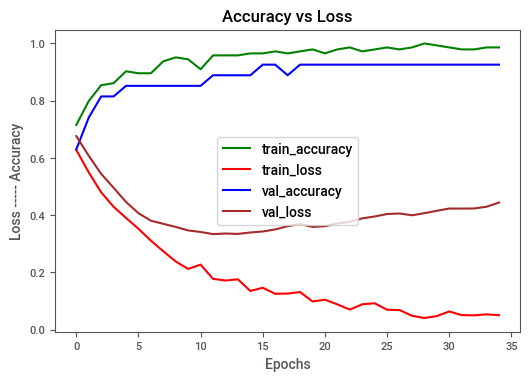

In [172]:
plt.plot(model_history.history['accuracy'], color='g', label='train_accuracy')
plt.plot(model_history.history['loss'], color='r', label='train_loss')
plt.plot(model_history.history['val_accuracy'], color='b', label='val_accuracy')
plt.plot(model_history.history['val_loss'], color='brown', label='val_loss')
plt.legend(loc='upper_left')
plt.title("Accuracy vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss ----- Accuracy")

In [173]:
xgbOpt_ypred = xgbOpt.predict(X_test)
adbOpt_ypred = adbOpt.predict(X_test)
catboostOpt_ypred = catboostOpt.predict(X_test)
rfcOpt_ypred = rfcOpt.predict(X_test)
model_pred = model.predict(X_test)

In [189]:
print()
print("Accuracy of XGBoost on Train set is ", xgbOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of AdaBoost on Train set is ", adbOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of CatBoost on Train set is ", catboostOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of Random Forest on Train set is ", rfcOpt.score(X_train, y_train))
print()
print("=================================================================")
print()
print("Accuracy of ANN on Train set is ", grcv_ann.score(X_train, y_train))
print()
print("=================================================================")
print("=================================================================")
print()
print("Accuracy of XGBoost on Test set is ", accuracy_score(y_test, xgbOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of AdaBoost on Test set is ", accuracy_score(y_test, adbOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of CatBoost on Test set is ", accuracy_score(y_test, catboostOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of Random Forest on Test set is ", accuracy_score(y_test, rfcOpt_ypred))
print()
print("=================================================================")
print()
print("Accuracy of ANN on Test set is ", accuracy_score(y_test, grcv_ann.predict(X_test)))
print()


Accuracy of XGBoost on Train set is  0.9930555555555556


Accuracy of AdaBoost on Train set is  1.0


Accuracy of CatBoost on Train set is  1.0


Accuracy of Random Forest on Train set is  1.0


Accuracy of ANN on Train set is  1.0


Accuracy of XGBoost on Test set is  0.8518518518518519


Accuracy of AdaBoost on Test set is  0.7407407407407407


Accuracy of CatBoost on Test set is  0.8518518518518519


Accuracy of Random Forest on Test set is  0.8518518518518519


Accuracy of ANN on Test set is  0.9259259259259259



----

---

## 4. Interpret and Evaluate

- Lime
- eli5

In [176]:
"""
Lets evaluate the model using visualization of Lime and eli5
"""
from lime import lime_tabular
import eli5

In [190]:
# First create lime explainer
features_names = dno.columns.to_list()
features_names.remove("class")
classes_names=["Die", "Live"]
len(features_names)

11

In [191]:
lexplainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=features_names, class_names=classes_names, discretize_continuous=True)

In [192]:
"""
Taking a row of X_test for prediction
"""
catboostOpt.predict(np.array(X_test.iloc[1]).reshape(1,-1))

array([1], dtype=int64)

In [193]:
exp = lexplainer.explain_instance(data_row= X_test.iloc[1],predict_fn = grcv_ann.predict_proba, num_features=14, top_labels=1)

In [194]:
exp.show_in_notebook(show_table=True, show_all=False)

---

In [196]:
"""
Since eli5 does not support ANN, we are using Random Forest
"""
eli5.show_prediction(rfcOpt, X_test.iloc[1],top=11,feature_names=features_names, target_names = classes_names)

---

---

## 5. Confusion Metrics

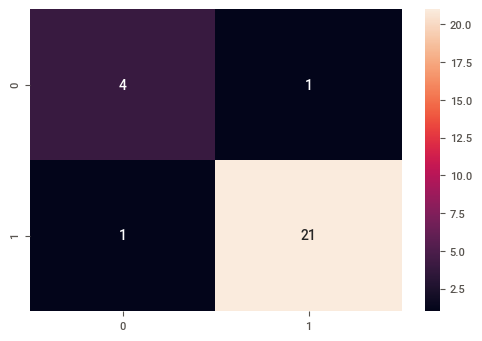

In [197]:
"""
We will only do confusion metrics of ANN
"""
ann_pred = grcv_ann.predict(X_test)
cm = confusion_matrix(y_test, ann_pred)
sns.heatmap(cm, annot=True)

In [198]:
cr = classification_report(y_test, catboostOpt_ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.88      0.95      0.91        22

    accuracy                           0.85        27
   macro avg       0.77      0.68      0.71        27
weighted avg       0.84      0.85      0.84        27



## Conclusion:
- ANN performed better
- Production is done using app.py file
- Deployment is done using Heroku